
# Initiation au Machine Learning en Python

Bienvenue dans ce TD ! Ici, vous allez découvrir les bases d'un pipeline complet de Machine Learning, étape par étape, avec des **explications détaillées**, **des exemples** et **des exercices pratiques**.

Ce TD s'appuie sur un jeu de données médical (cancer du sein) et montre comment :  
- Charger des données  
- Nettoyer et préparer les données  
- Entraîner un modèle de machine learning  
- Évaluer ses performances  

Le but est de vous donner une **vision claire et concrète** de la puissance du Machine Learning avec Python.

---


# TD exemple pour le ML en Python (Guillaume Bachelot, Alexandre Godmer)

### --> Ces étapes permettent de créer un pipeline complet en décomposant les différentes étapes clés : l'imputation des valeurs manquantes, la standardisation des données, l'entraînement du modèle, et l'évaluation des résultats. Vous pouvez facilement réutiliser ces étapes pour d'autres tâches de machine learning avec des modifications mineures selon les besoins.

## Mise en place de l'environnement

In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle

In [2]:
# Pour cloner un dépôt GitHub entier
!git clone 'https://github.com/agodmer/Formation_IA'

Cloning into 'Formation_IA'...
remote: Enumerating objects: 204, done.
remote: Counting objects: 100% (204/204), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 204 (delta 86), reused 110 (delta 29), pack-reused 0 (from 0)
Receiving objects: 100% (204/204), 36.59 MiB | 23.37 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [3]:
# Pour télécharger un fichier spécifique depuis GitHub
!wget 'https://github.com/agodmer/UE-Medecine-IA-Omics/blob/main/Data/Breast_Cancer_Wisconsin.csv' -O nom_du_fichier

--2025-03-13 08:38:17--  https://github.com/agodmer/UE-Medecine-IA-Omics/blob/main/Data/Breast_Cancer_Wisconsin.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘nom_du_fichier’

nom_du_fichier          [  <=>               ] 657.27K  2.11MB/s    in 0.3s    

2025-03-13 08:38:18 (2.11 MB/s) - ‘nom_du_fichier’ saved [673046]



## Jeu de données "Breast Cancer Wisconsin" de Kaggle


## Étape 1 : Importer les bibliothèques

Une **bibliothèque** contient des fonctions toutes prêtes que nous allons utiliser pour :  
- Manipuler les données (`pandas`, `numpy`)  
- Créer des graphiques (`matplotlib`, `seaborn`)  
- Appliquer des modèles de machine learning (`sklearn`)


In [9]:
# Import des bibliothèques nécessaires
import pandas as pd
# Import des bibliothèques nécessaires
import numpy as np
# Import des bibliothèques nécessaires
from sklearn.model_selection import train_test_split
# Import des bibliothèques nécessaires
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Import des bibliothèques nécessaires
from sklearn.impute import SimpleImputer
# Import des bibliothèques nécessaires
from sklearn.ensemble import RandomForestClassifier
# Import des bibliothèques nécessaires
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Import des bibliothèques nécessaires
import seaborn as sns
# Import des bibliothèques nécessaires
import matplotlib.pyplot as plt


## Étape 2 : Chargement et prétraitement des données

Nous allons maintenant :
- Charger un fichier `.csv` contenant nos données médicales
- Nettoyer les données : supprimer les colonnes inutiles, gérer les valeurs manquantes, transformer les variables catégorielles

📌 Ces étapes sont **essentielles** pour que l'algorithme puisse apprendre efficacement.


In [12]:
# Chargement du fichier CSV
# Chargement du fichier CSV dans un DataFrame
df = pd.read_csv("/content/Formation_IA/Data/Breast_Cancer_Wisconsin.csv", sep=';')

# Visualisation des premières lignes
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

Dix valeurs réelles sont calculées pour chaque noyau cellulaire :

a) rayon (moyenne des distances entre le centre et les points du périmètre)

b) texture (écart-type des valeurs en niveaux de gris)

c) périmètre

d) surface

e) douceur (variation locale de la longueur des rayons)

f) compacité (périmètre^2 / surface - 1,0)

g) concavité (gravité des parties concaves du contour)

h) points concaves (nombre de parties concaves du contour)

i) symétrie

j) dimension fractale ("approximation du trait de côte" - 1)

## 3. Nettoyage des Données

Vérification de la présence de données manquantes ?

In [13]:
# Suppression des colonnes inutiles (si nécessaire)
# Exemple : si une colonne n'est pas utile pour la modélisation
# df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')

# Vérification des valeurs manquantes
print("Nombre de valeurs manquantes par colonne:")
print(df.isnull().sum())

Nombre de valeurs manquantes par colonne:
id                          0
diagnosis                   0
radius_mean                 3
texture_mean                4
perimeter_mean              5
area_mean                   4
smoothness_mean            20
compactness_mean           17
concavity_mean             16
concave points_mean         8
symmetry_mean              16
fractal_dimension_mean     12
radius_se                  11
texture_se                  2
perimeter_se                1
area_se                     9
smoothness_se              10
compactness_se              1
concavity_se               12
concave points_se           9
symmetry_se                13
fractal_dimension_se        7
radius_worst                9
texture_worst               5
perimeter_worst             9
area_worst                  3
smoothness_worst            2
compactness_worst           1
concavity_worst             2
concave points_worst        7
symmetry_worst              2
fractal_dimension_worst     

## 4. Division des Données en Entraînement et Test

In [15]:
# Séparer les caractéristiques (X) de la cible (y)
# Remarque : ajustez les noms de colonnes en fonction du fichier CSV
X = df.drop(columns=["diagnosis"])  # Toutes les caractéristiques
y = df["diagnosis"]  # La cible (diagnosis)

# Conversion des étiquettes en numériques
# Encodage des variables catégorielles en numériques
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convertit 'B' et 'M' en 0 et 1

# Division en ensembles d'entraînement et de test
# Séparation des données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5.a Imputation des Valeurs Manquantes

In [16]:
# Import des bibliothèques nécessaires
from sklearn.impute import SimpleImputer

# Créer un imputer qui remplace les valeurs manquantes par la moyenne
# Imputation des valeurs manquantes (remplacement par la moyenne)
imputer = SimpleImputer(strategy="mean")

# Appliquer l'imputer à l'ensemble d'entraînement
X_train_imputed = imputer.fit_transform(X_train)

# Appliquer l'imputer à l'ensemble de test (sans "fit" pour éviter des fuites de données)
X_test_imputed = imputer.transform(X_test)

## 5.b Standardisation des Données

In [17]:
# Import des bibliothèques nécessaires
from sklearn.preprocessing import StandardScaler

# Créer un scaler pour standardiser les caractéristiques
# Standardisation des données
scaler = StandardScaler()

# Appliquer le scaler à l'ensemble d'entraînement
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Appliquer le scaler à l'ensemble de test
X_test_scaled = scaler.transform(X_test_imputed)

## 5.c Entraînement du Modèle

In [18]:
# Import des bibliothèques nécessaires
from sklearn.ensemble import RandomForestClassifier

# Créer un modèle de Random Forest
# Création du modèle de classification
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle avec l'ensemble d'entraînement
# Entraînement du modèle
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## 6. Prédiction et Évaluation

Accuracy: 0.9707602339181286
Rapport de classification:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



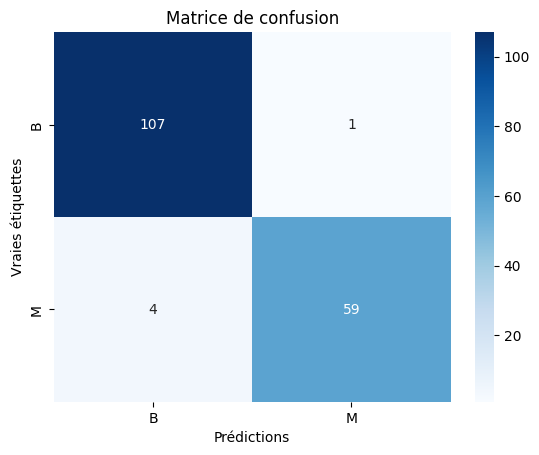

In [19]:
# Import des bibliothèques nécessaires
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Import des bibliothèques nécessaires
import seaborn as sns
# Import des bibliothèques nécessaires
import matplotlib.pyplot as plt

# Prédire sur l'ensemble de test
# Prédictions sur les données de test
y_pred = classifier.predict(X_test_scaled)

# Calcul de l'accuracy
# Évaluation du score de précision
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher le rapport de classification
print("Rapport de classification:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.title("Matrice de confusion")
plt.show()


## Pourquoi diviser les données en **train** et **test** ?

Quand on construit un modèle, il est **entraîné** sur une partie des données (`train set`).  
Mais pour savoir s’il est bon, il faut le tester sur des données qu’il n’a **jamais vues** (`test set`).  
Sinon, on risque de tomber dans le piège du **sur-apprentissage** (overfitting) : le modèle apprend trop bien... mais seulement sur les données qu'il connaît !

### Illustration :

| Jeu de données | Utilisation | Contenu |
|----------------|-------------|---------|
| `X_train` / `y_train` | Entraînement | Le modèle apprend ici |
| `X_test` / `y_test` | Évaluation | On vérifie que le modèle généralise bien |

✏️ **À retenir** : toujours garder une partie des données de côté pour tester le modèle de manière réaliste.



## Quelles sont les **métriques** pour évaluer un modèle de classification ?

Une fois qu’on a les prédictions, on peut mesurer la qualité avec :

- **Accuracy (précision globale)** : % de bonnes prédictions
- **Precision** : parmi les positifs prédits, combien sont vraiment positifs ?
- **Recall (rappel)** : parmi les vrais positifs, combien ont été bien détectés ?
- **F1-score** : moyenne harmonique de la précision et du rappel

Ces scores sont résumés dans la fonction `classification_report()` de `sklearn`.



## Comment lire une **matrice de confusion** ?

C’est un tableau qui compare les prédictions avec la réalité.

Exemple :

|                  | Prédit : Bénin | Prédit : Malin |
|------------------|----------------|----------------|
| Réel : Bénin     | Vrai négatif   | Faux positif   |
| Réel : Malin     | Faux négatif   | Vrai positif   |

- **Vrai Positif (VP)** : le modèle a correctement prédit "Malin"
- **Faux Positif (FP)** : il a prédit "Malin" mais c’était "Bénin"
- **Faux Négatif (FN)** : il a prédit "Bénin" mais c’était "Malin"
- **Vrai Négatif (VN)** : il a bien prédit "Bénin"

✏️ Interprétez chaque case pour comprendre les erreurs possibles de votre modèle.



## Aller plus loin : Optimisation et validation croisée

Une fois que notre modèle fonctionne, on peut aller plus loin en améliorant sa **performance** grâce à :
- **Validation croisée** (`cross-validation`) : tester le modèle sur plusieurs découpages des données
- **Recherche de paramètres optimaux** (`GridSearchCV`) : tester plusieurs combinaisons d'options du modèle

### Pourquoi c’est important ?
Tous les modèles ont des **paramètres internes** (appelés *hyperparamètres*) qui influencent leur efficacité.  
Avec `GridSearchCV`, on peut **tester plusieurs versions** du modèle et garder celle qui donne le meilleur résultat.



In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Exemple de grille de recherche de paramètres
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
}

# Création du modèle de base
rf = RandomForestClassifier(random_state=42)

# Recherche par validation croisée
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)
print("Score sur validation croisée :", grid_search.best_score_)



### Validation croisée seule (sans recherche de paramètres)
On peut aussi simplement évaluer un modèle en le testant sur plusieurs **sous-ensembles** des données.


In [ ]:

# Score moyen sur 5 plis (5-fold cross-validation)
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Scores par pli :", scores)
print("Score moyen :", scores.mean())



✏️ **Exercice** : essayez avec d'autres modèles (`LogisticRegression`, `KNeighborsClassifier`, etc.) et comparez les résultats.



## Bonus : Autres modèles de Machine Learning à connaître

Il existe plusieurs types de modèles pour faire de la **classification**. Voici deux autres algorithmes très connus et faciles à utiliser.



### Régression Logistique

Contrairement à son nom, c'est un **modèle de classification**, pas de régression !  
Elle est souvent utilisée pour **prédire une probabilité d'appartenance à une classe** (ex : malade ou non).

Elle fonctionne bien quand les classes sont **linéairement séparables**.

Exemple d'utilisation :


In [ ]:

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy (Régression logistique) :", accuracy_score(y_test, y_pred_log))



### K plus proches voisins (KNN)

Le modèle **KNN** (K Nearest Neighbors) classe un nouvel exemple en regardant les **K exemples les plus proches** dans les données d'entraînement.

Il est simple, mais peut être lent si les données sont nombreuses.

Exemple d'utilisation :


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("Accuracy (KNN) :", accuracy_score(y_test, y_pred_knn))



✏️ **Exercice** : Modifiez la valeur de `n_neighbors` et observez l'effet sur la précision.

---

🎓 Ces deux modèles sont très utilisés comme points de départ, car :
- Ils sont simples à comprendre et à implémenter
- Ils permettent de comparer différentes stratégies de modélisation

N'hésitez pas à les tester et à comparer leurs résultats avec le modèle Random Forest vu plus tôt.



## Introduction aux Réseaux de Neurones (ANN - Artificial Neural Network)

Les **réseaux de neurones** sont des modèles inspirés du fonctionnement du cerveau humain.  
Ils sont constitués de **couches de neurones artificiels** qui apprennent à détecter des motifs dans les données.

Dans leur forme la plus simple (appelée **perceptron multicouche**), ils peuvent déjà être très efficaces.

On utilise ici `MLPClassifier` (Multi-Layer Perceptron) de `scikit-learn`.


In [ ]:

from sklearn.neural_network import MLPClassifier

# Réseau de neurones simple avec une couche cachée de 10 neurones
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("Accuracy (Réseau de neurones) :", accuracy_score(y_test, y_pred_mlp))



### Comment fonctionne ce réseau ?

- `hidden_layer_sizes=(10,)` signifie qu’il y a **1 couche cachée** avec **10 neurones**
- `max_iter=1000` définit le nombre d’itérations (le nombre de fois où le réseau essaie d’apprendre)

Chaque neurone combine les entrées avec des **poids** puis applique une **fonction d'activation** (souvent ReLU ou sigmoïde).

Le modèle ajuste ses poids pour **minimiser l’erreur** entre les prédictions et la réalité.

---

✏️ **Exercice** : Essayez d’augmenter le nombre de neurones ou de couches (`hidden_layer_sizes=(100,)`, `(50, 20)`, etc.) et observez l’effet.

⚠️ Les réseaux de neurones sont puissants, mais demandent souvent plus de données et de temps de calcul.

